In [27]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
concentrations = pd.read_csv('ConcentrationsDataAll.csv', sep = ",", low_memory=False)
cd = pd.read_csv('Concentrations_Diversity.csv', sep = ",", low_memory=False)
cd.head()

,Subject Number,Handedness,Hand,Subject,1-Chlorononane,1-nonanol,1-Octadecene,"2,4-Diisopropylphenol",alpha-amylcinnamaldehyde,alpha-hexylcinnameldehyde,...,Pentadecane,Pristane,Tetradecane,Tetradecanoic acid,Undecanoic Acid,Isopropyl Palmitate,Isoamyl Salicylate,Decanoic Acid,Octacosane,Diversity
0,M3-100818-LH,R,L,1,0,0.624539,0.0,0.0,0.0,0.0,...,0.000000,0.663282,0.0,2.347639,0,0.750517,0,0.0,0.0,13
1,M3-100818-RH,R,R,1,0,0.590086,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.810394,0,0.606584,0,0.0,0.0,12
2,M13-100818-LH,R,L,2,0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.559956,0.0,1.008170,0,0.000000,0,0.0,0.0,11
3,M13-100818-RH,R,R,2,0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0,0.000000,0,0.0,0.0,2
4,M14-100818-LH,R,L,3,0,0.514102,0.0,0.0,0.0,0.0,...,1.027994,0.616981,0.0,0.625230,0,0.000000,0,0.0,0.0,13


In [5]:
if isinstance(cd, pd.DataFrame):
        print ("This is a Dataframe");
        features = ['1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane']
samples = concentrations.loc[:, features].values
samples

This is a Dataframe


array([[ 0.        ,  0.62453941,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  4.37431508,  0.        ,  4.95022494,
         1.76883448,  1.02670354,  0.        ,  0.91773582,  0.        ,
         1.04214087,  0.        ,  1.57240809,  1.99920598,  0.        ,
         0.66328163,  0.        ,  2.34763913,  0.        ,  0.75051669,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.59008575,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  3.9672146 ,  0.        ,  1.96833542,
         0.8303645 ,  0.        ,  0.        ,  0.96694095,  5.6920586 ,
         0.81862087,  0.        ,  1.54983456,  0.95628112,  0.        ,
         0.        ,  0.        ,  1.81039355,  0.        ,  0.60658441,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  3.69428972,  0.        ,  1.15711555,
         1.31891442,  0.8562

In [7]:
subjects = cd.loc[:,['Subject']].values
subjects

array([[ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [10],
       [10]])

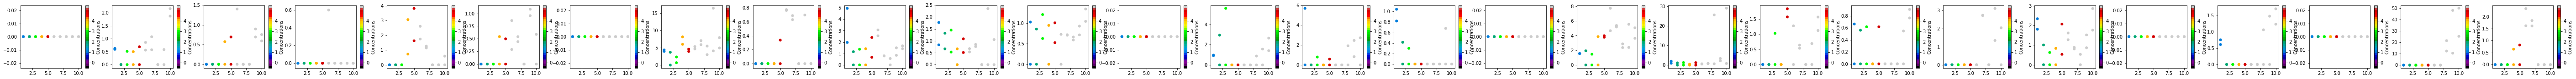

In [14]:
counter = 1;

plt.figure(figsize=(100, 30))
for feature in features:
    plt.subplot(10, 28, counter)
    counter+=1
    plt.scatter(cd.loc[:,['Subject']].values, cd[feature], lw=0.1, c=cd.Subject, cmap=plt.cm.get_cmap('nipy_spectral', 28))
    plt.colorbar(ticks=range(5), label='Concentrations')
    plt.clim(-0.5, 5.5)

plt.show()

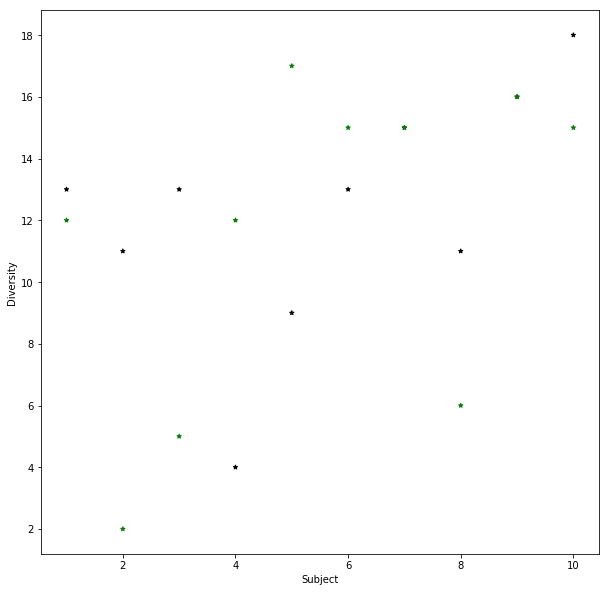

In [25]:
cd.plot.scatter(x='Subject', y='Diversity', marker='*', legend=True, c=['black', 'green', 'black', 'green','black', 'green','black', 'green','black', 'green', 'black', 'green','black', 'green','black', 'green','black', 'green', 'black', 'green'], figsize=(10,10))

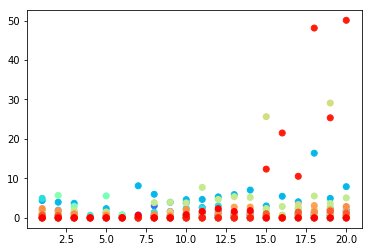

In [28]:
X = [1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Ys = np.array([
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0.624539413,0.590085747,0,0,0.514101725,0,0,0.500433092,0,0.688575478,0.856872285,0.55855658,0.574050512,1.074576854,0,0,0,0.581426688,2.161884038,1.874895677],
        [0,0,0,0,0,0,0,0.573010012,0,0.692658427,1.4028294,0,0,0,0,0,0.692825322,0.894853418,0.592489315,0.753984621],
        [0,0,0,0,0,0,0,0,0,0,0,0.598403,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0.72925312,3.065260536,1.627104025,3.822382501,2.613465175,1.749219998,1.149189781,1.265574737,0,0,0,0,0.589845894,0],
        [0,0,0,0,0,0,0,0.542375,0,0.498764,0.288083,0.859648,0.442191,0.540217,0,0,1.08359,0.956039,0,0.586652],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [4.374315084,3.967214599,3.694289725,0,2.338110764,0.683285785,8.131220265,5.98266741,3.946223756,4.618168071,4.665568936,5.327151376,5.899465955,7.048403141,3.014771582,5.47250474,4.083720208,16.39409618,4.938589144,7.907244089],
        [0,0,0,0,0,0,0,0,0,0.337070429,0.774406429,0.763050571,0.688685857,0.630974143,0,0,0,0.697072375,0,0],
        [4.950224944,1.968335417,1.157115548,0,1.371106607,0,0,1.418623607,0.666808587,2.401339958,2.542375805,3.06142818,0.785489648,0.792977647,0.559174659,0,0.840529991,1.495977356,1.424180067,1.66999094],
        [1.768834483,0.830364497,1.318914423,0.663482502,1.449266,0.528592884,0,0.664313,0.509064,1.084463,0.671282,0.534051,0.759839,0.84737,0,0,2.35057344,0,1.052782617,0],
        [1.026703544,0,0.856292558,0,1.208800362,0.626700309,0,0.946078,0.525011,1.007777,0,0.727359,0.718139,0.706506,0.589937,0.662829,0.927719,0.71409,1.043986,1.343995],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0.917735818,0.96694095,2.933674633,0,5.57803594,0,0,0,0,0,0,0,0,0,0.874475,0,1.566838,0,1.405993,2.648069],
        [0,5.692058605,0,0,0,0.794634958,0,0,0,0.5883405,0,0,0,0,1.921677,0,2.4662975,0.830503,2.7300255,0],
        [1.042140868,0.818620867,0.413978166,0,0.298649441,0,0,0,0,0,0,0,0,0,0,0,0,0.677496,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [1.572408088,1.549834559,1.933915441,0,1.470533088,0,0,3.857621762,3.985111508,3.785838657,7.72672921,4.670436347,5.381869428,5.186828247,2.370275946,2.878512621,2.391810749,5.542056958,3.636956995,5.06607346],
        [1.999205977,0.956281116,1.136841855,0,1.28705505,0,0,0.535975,0,1.24986,0.671282,0.534051,0.759839,0.84737,25.648704,0.670331,3.374301,2.178932,29.102695,0.837225],
        [0,0,0,0,1.027994297,0,0,0,1.570422,1.839609,0,1.275785,0.536801,0.638964,0,0,0,0.690525,1.123272,1.566752],
        [0.663281631,0,0.559955755,0,0.61698059,0,0,0,0,0.615896,0,0,0,0,0,0,0.5466555,0,0.9059955,0.764191],
        [0,0,0,0,0,0,0,0,0,0,0,0,2.72606,2.740798,0,0,1.347453,3.114908,2.046757,0],
        [2.347639133,1.810393546,1.008169868,0,0.625230353,0,0,0.834333577,0.531473276,2.076128417,1.621208168,1.275486047,0.883028437,0.807063696,0.529298322,0,0.865915206,1.51981,1.76476721,2.867453347],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0.750516691,0.606584414,0,0,0,0,0,0,0,0,0,0,0,0,1.055334,0,1.469721,0,1.694087,1.225649],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.3546409,21.5085478,10.53347115,48.10468735,25.35324724,50.06968317],
        [0,0,0,0,0,0,0.643682479,0,0,0.816244196,1.616876775,2.331352456,1.608575121,1.836280859,0,0,0,0,0,0]
])
nCols = len(X)  
nRows = Ys.shape[0]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Ys)))

cs = [colors[i//len(X)] for i in range(len(Ys)*len(X))] #could be done with numpy's repmat
Xs=X*nRows #use list multiplication for repetition
matplotlib.pyplot.scatter(Xs,Ys.flatten(), color=cs)

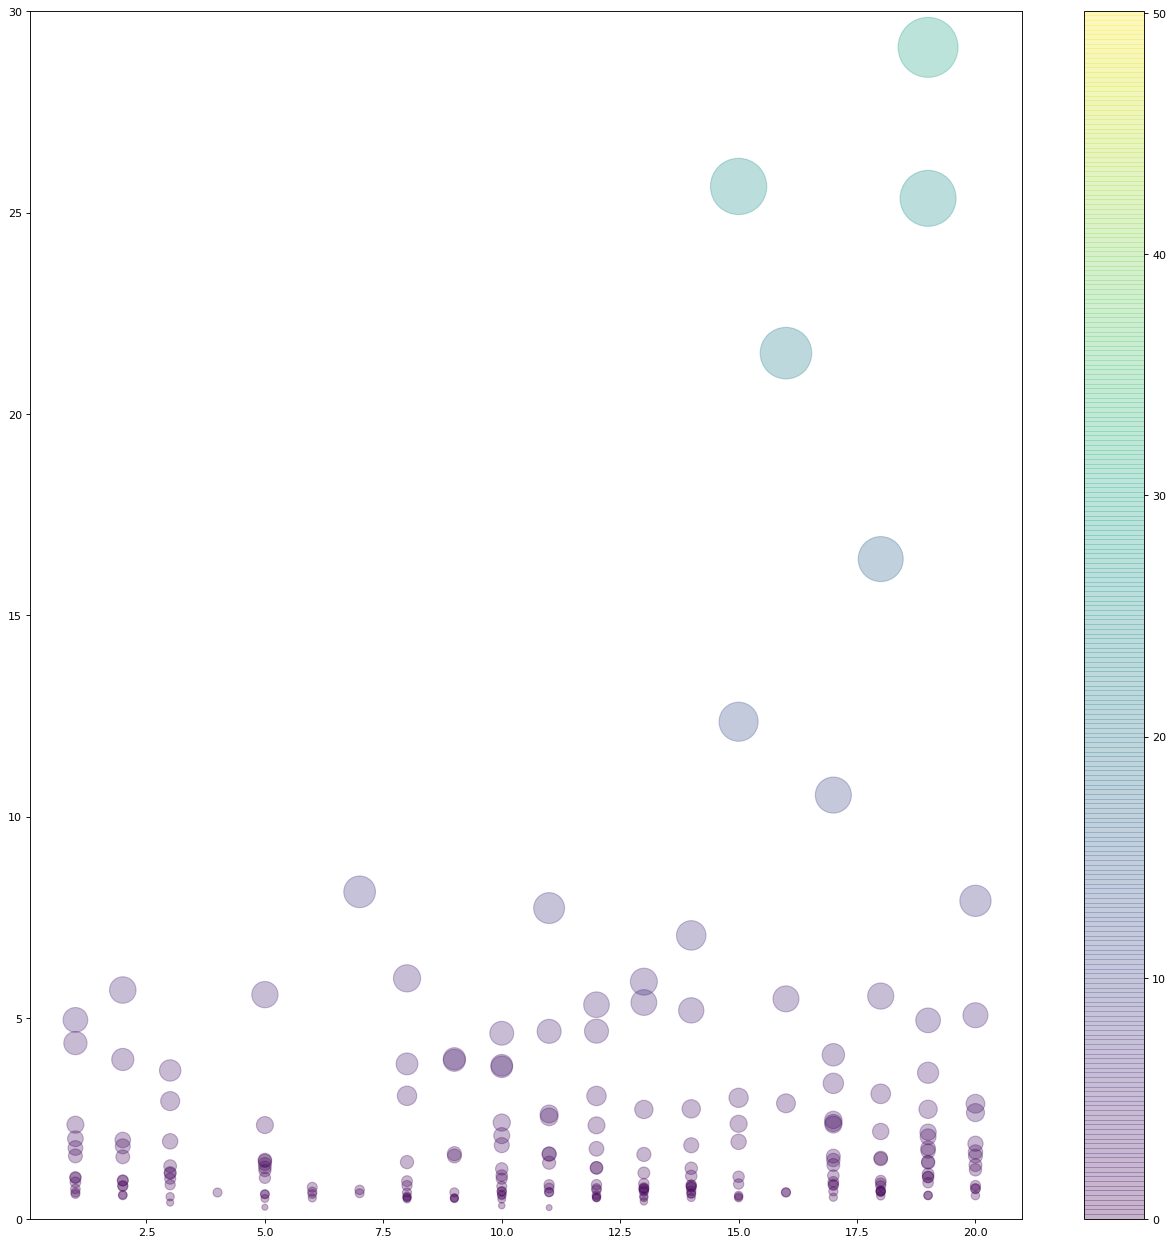

In [29]:
x = Xs
y = Ys.flatten()
colors = Ys.flatten()
sizes = Ys.flatten() * 100
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.ylim(0, 30)
plt.colorbar();

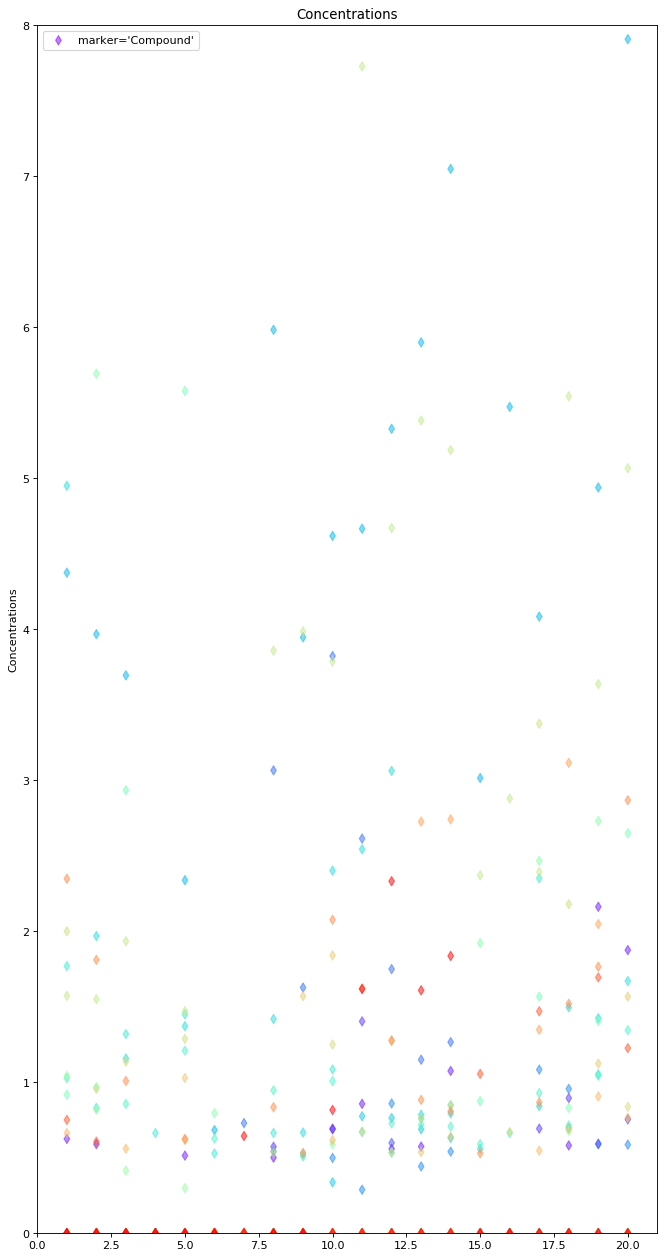

In [37]:
plt.figure(figsize=(10, 20), dpi=80)
matplotlib.pyplot.scatter(Xs,Ys.flatten(), color=cs, alpha=0.5, marker='d', label="marker='Compound'".format('d'))

plt.ylabel('Concentrations')
plt.title('Concentrations')  

plt.xlim(0, 21)
plt.ylim(0,8)
plt.legend(loc='upper left')

In [38]:
concentrations.columns

Index(['Ethnicity', 'Gender', 'Dominant Hand', 'Trial Run', 'Subject Number ',
       '1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane'],
      dtype='object')

In [39]:
concentrations.shape

(20, 33)

In [40]:
dfConc = pd.DataFrame(concentrations, columns = ['Ethnicity', 'Gender', 'Dominant Hand', 'Trial Run', 'Subject Number ',
       '1-Chlorononane', '1-nonanol', '1-Octadecene', '2,4-Diisopropylphenol',
       'alpha-amylcinnamaldehyde', 'alpha-hexylcinnameldehyde', 'Benzophenone',
       'Decanal', 'Dibutyl Phthalate', 'Dodecanoic acid', 'heptadecane',
       'Hexadecane ', 'Hexyl salicylate', 'Isopropyl Myristate',
       'Methyl Decanoate', 'Methyl palmitate', 'Napthalene', 'Nonanal',
       'Octadecane', 'Pentadecane', 'Pristane', 'Tetradecane',
       'Tetradecanoic acid', 'Undecanoic Acid', 'Isopropyl Palmitate',
       'Isoamyl Salicylate', 'Decanoic Acid', 'Octacosane']);
dfConc.head()

,Ethnicity,Gender,Dominant Hand,Trial Run,Subject Number,1-Chlorononane,1-nonanol,1-Octadecene,"2,4-Diisopropylphenol",alpha-amylcinnamaldehyde,...,Octadecane,Pentadecane,Pristane,Tetradecane,Tetradecanoic acid,Undecanoic Acid,Isopropyl Palmitate,Isoamyl Salicylate,Decanoic Acid,Octacosane
0,African American,Male,NaN,NaN,M3-100818-LH,0,0.624539,0.0,0.0,0.0,...,1.999206,0.000000,0.663282,0.0,2.347639,0,0.750517,0,0.0,0.0
1,African American,Male,NaN,NaN,M3-100818-RH,0,0.590086,0.0,0.0,0.0,...,0.956281,0.000000,0.000000,0.0,1.810394,0,0.606584,0,0.0,0.0
2,African American,Male,NaN,NaN,M13-100818-LH,0,0.000000,0.0,0.0,0.0,...,1.136842,0.000000,0.559956,0.0,1.008170,0,0.000000,0,0.0,0.0
3,African American,Male,NaN,NaN,M13-100818-RH,0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,0,0.0,0.0
4,African American,Male,NaN,NaN,M14-100818-LH,0,0.514102,0.0,0.0,0.0,...,1.287055,1.027994,0.616981,0.0,0.625230,0,0.000000,0,0.0,0.0


In [41]:
if isinstance(concentrations, pd.DataFrame):
        print ("This is a Dataframe");

This is a Dataframe


In [43]:
dfConc = dfConc.drop("Ethnicity", axis=1)
dfConc = dfConc.drop("Dominant Hand", axis=1)
dfConc = dfConc.drop("Trial Run", axis=1)
dfConc = dfConc.drop("Gender", axis=1)
dfConc.head()

KeyError: "labels ['Ethnicity'] not contained in axis"

In [44]:
dfConc.infer_objects()
dfConc.head()

,Subject Number,1-Chlorononane,1-nonanol,1-Octadecene,"2,4-Diisopropylphenol",alpha-amylcinnamaldehyde,alpha-hexylcinnameldehyde,Benzophenone,Decanal,Dibutyl Phthalate,...,Octadecane,Pentadecane,Pristane,Tetradecane,Tetradecanoic acid,Undecanoic Acid,Isopropyl Palmitate,Isoamyl Salicylate,Decanoic Acid,Octacosane
0,M3-100818-LH,0,0.624539,0.0,0.0,0.0,0.0,0,4.374315,0.0,...,1.999206,0.000000,0.663282,0.0,2.347639,0,0.750517,0,0.0,0.0
1,M3-100818-RH,0,0.590086,0.0,0.0,0.0,0.0,0,3.967215,0.0,...,0.956281,0.000000,0.000000,0.0,1.810394,0,0.606584,0,0.0,0.0
2,M13-100818-LH,0,0.000000,0.0,0.0,0.0,0.0,0,3.694290,0.0,...,1.136842,0.000000,0.559956,0.0,1.008170,0,0.000000,0,0.0,0.0
3,M13-100818-RH,0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,0,0.0,0.0
4,M14-100818-LH,0,0.514102,0.0,0.0,0.0,0.0,0,2.338111,0.0,...,1.287055,1.027994,0.616981,0.0,0.625230,0,0.000000,0,0.0,0.0


In [45]:
dfConc.dtypes

Subject Number                object
1-Chlorononane                 int64
1-nonanol                    float64
1-Octadecene                 float64
2,4-Diisopropylphenol        float64
alpha-amylcinnamaldehyde     float64
alpha-hexylcinnameldehyde    float64
Benzophenone                   int64
Decanal                      float64
Dibutyl Phthalate            float64
Dodecanoic acid              float64
heptadecane                  float64
Hexadecane                   float64
Hexyl salicylate               int64
Isopropyl Myristate          float64
Methyl Decanoate             float64
Methyl palmitate             float64
Napthalene                     int64
Nonanal                      float64
Octadecane                   float64
Pentadecane                  float64
Pristane                     float64
Tetradecane                  float64
Tetradecanoic acid           float64
Undecanoic Acid                int64
Isopropyl Palmitate          float64
Isoamyl Salicylate             int64
D

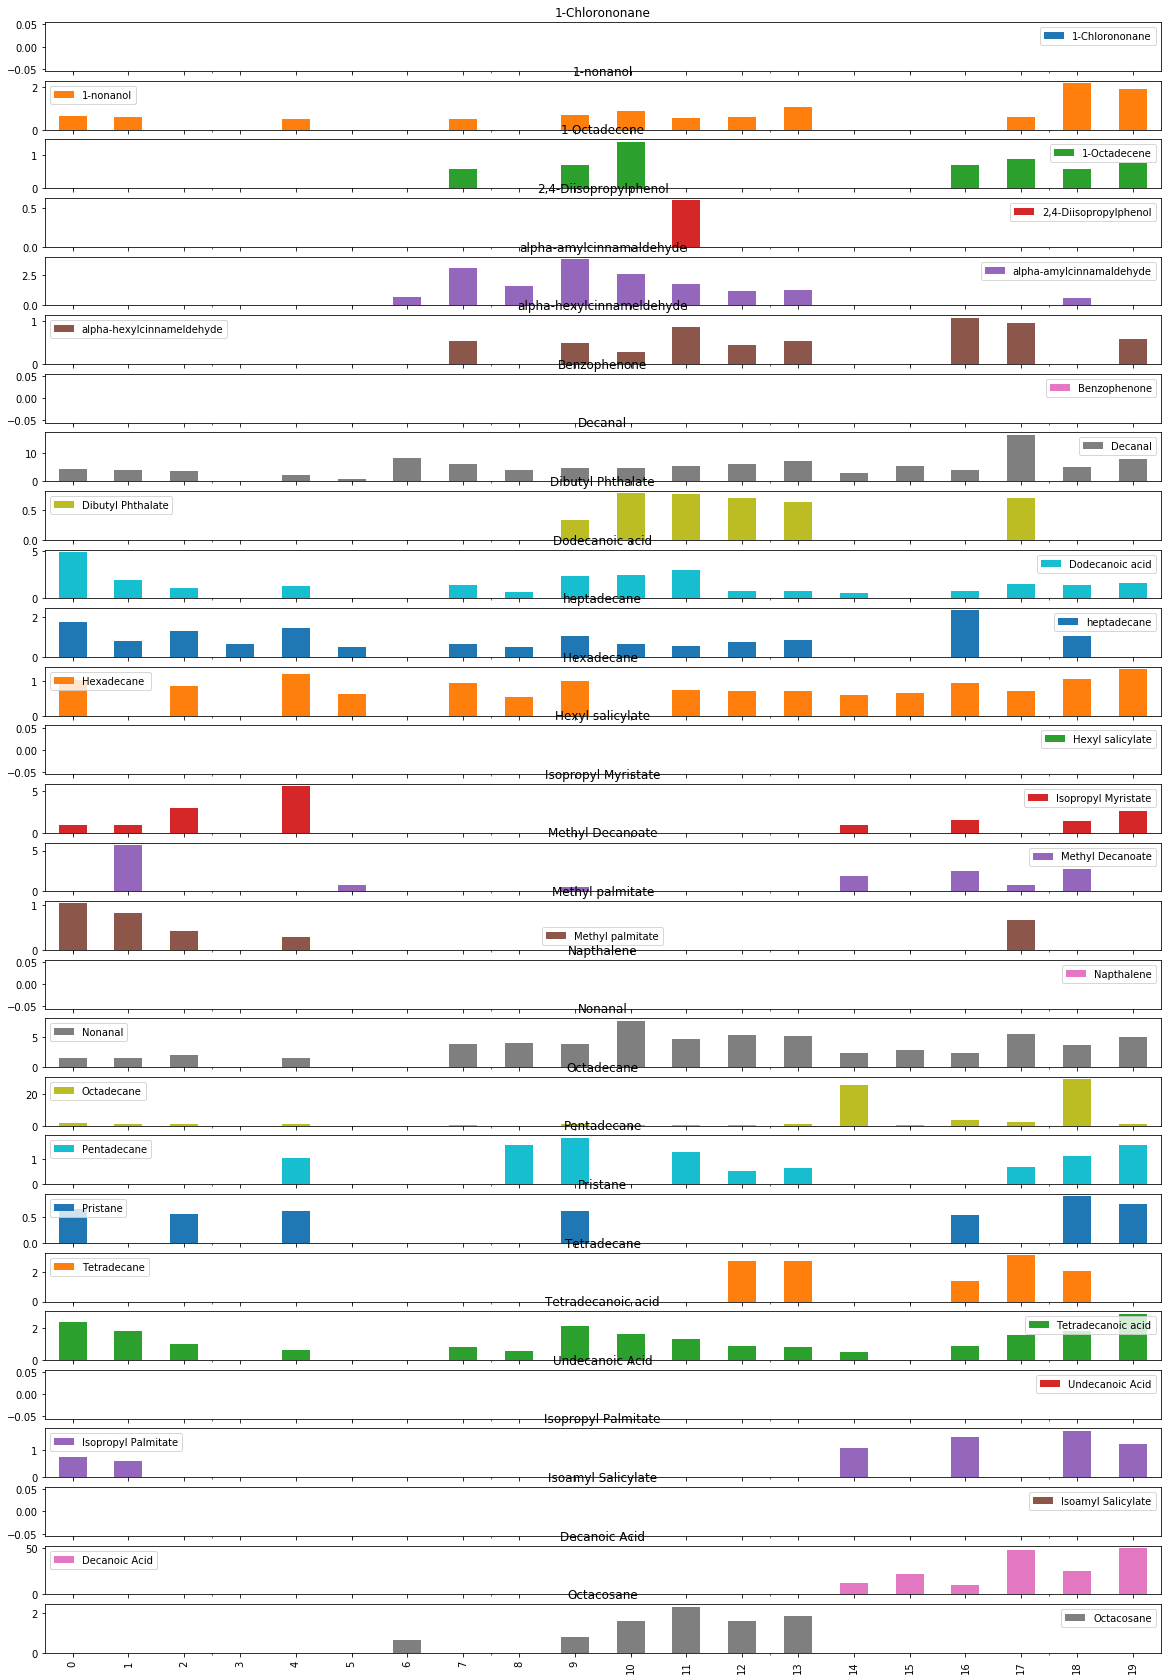

In [47]:
dfConc.plot.bar(stacked=True, subplots=True, figsize=(20, 30));

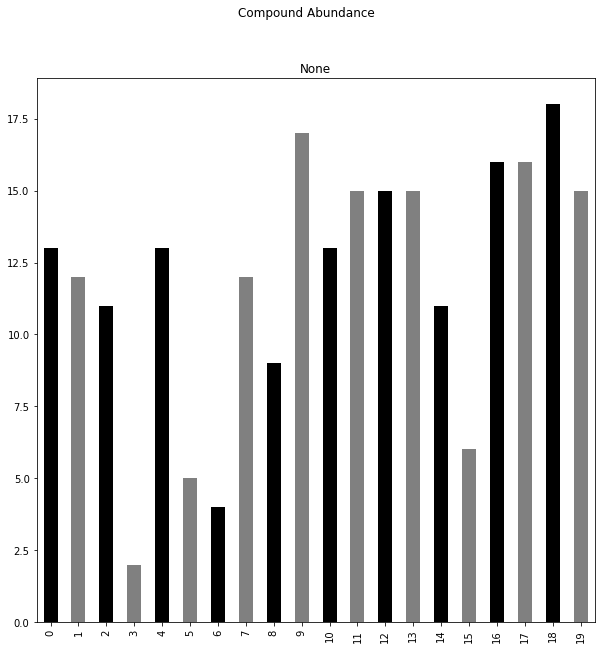

In [62]:
dfDiversity = dfConc.astype(bool).sum(axis=1)
dfDiversity
diversityDF = pd.DataFrame(dfDiversity)
diversityDF

bars = dfDiversity.plot.bar(x='Sample', y="Diversity",title="Compound Abundance", stacked=True, subplots=True, figsize=(10, 10), color=['black', 'grey', 'black', 'grey','black', 'grey','black', 'grey','black', 'grey', 'black', 'grey','black', 'grey','black', 'grey','black', 'grey', 'black', 'grey']);
plt.show()

In [63]:
diversityDF

,0
0,13
1,12
2,11
3,2
4,13
5,5
6,4
7,12
8,9
9,17


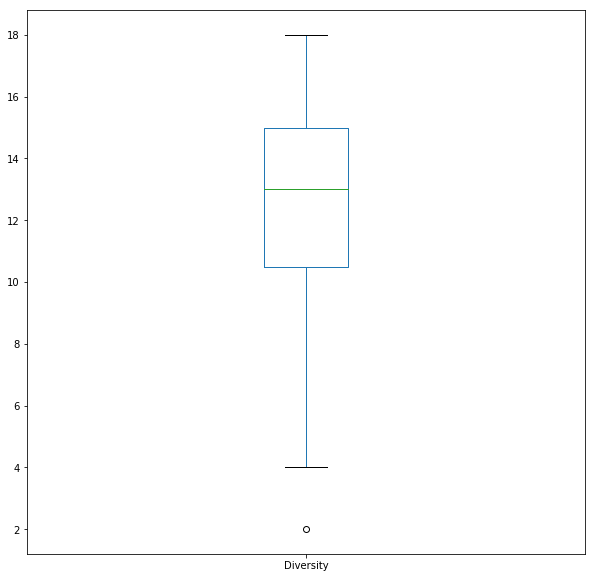

In [74]:
cd.plot.box(x='Subject', y='Diversity', figsize=(10,10))

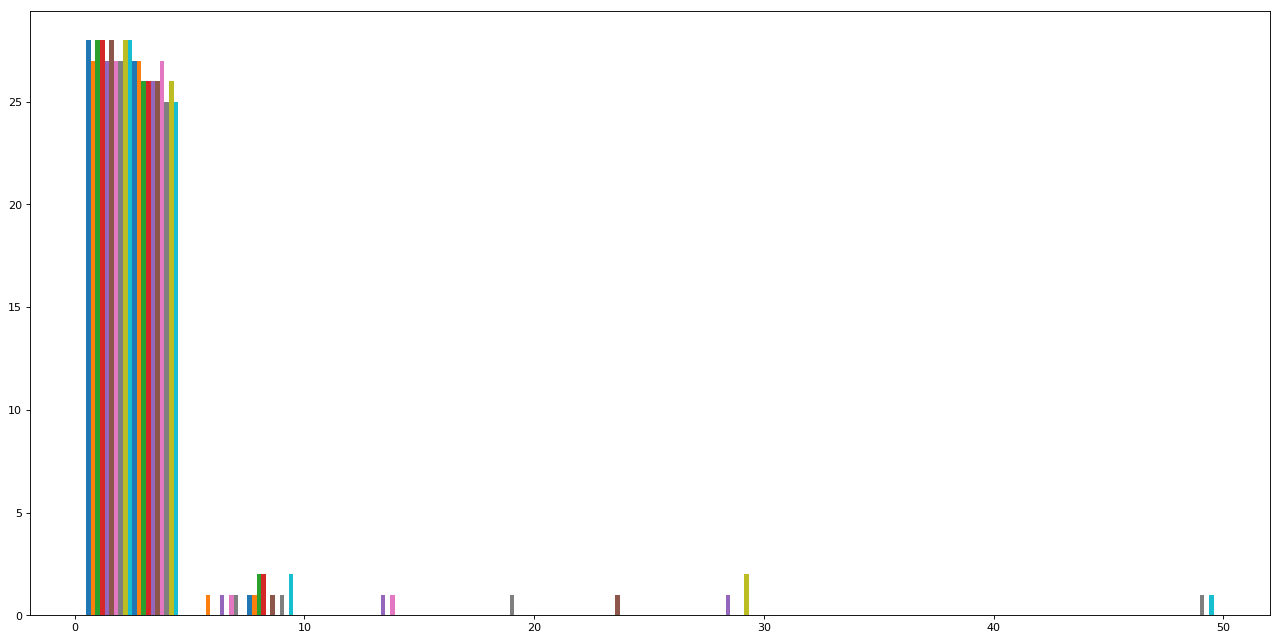

In [85]:
plt.figure(figsize=(20, 10), dpi=80)
plt.hist(Ys)
plt.show()